In [2]:
import os
import json
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Directory containing the JSON files
results_dir = './results'


def plot(results_dir, type = None):
    data_list = []

    # Loop through each file in the directory
    for filename in os.listdir(results_dir):
        if filename.endswith('.json'):
            if type != None:
                if type not in filename:
                    continue
            # Load the data from the JSON file
            with open(os.path.join(results_dir, filename), 'r') as file:
                data = json.load(file)

            model_id = data['model_id']
            train_acc_list = data.get('train_accuracy', None)
            train_loss_list = data.get('train_loss', None)
            val_acc_list = data.get('val_accuracy', None)
            val_loss_list = data.get('val_loss', None)
            best_val_acc = data['results'].get('best_acc', None)
            best_epoch = data['results'].get('best_acc_epoch', None)
            cm = np.array(data['results'].get('confusion_matrix', [])) if 'confusion_matrix' in data['results'] else None

            # Extract hyperparameters if available, otherwise set as None
            lr = data['hyperparameters'].get('learning_rate', None)
            epochs = data['hyperparameters'].get('num_epochs', None)
            batch_size = data['hyperparameters'].get('batch_size', None)
            max_len = data['hyperparameters'].get('max_len', None)
            

            row_data = {
                'model_id': model_id,
                'learning_rate': lr,
                'num_epochs': epochs,
                'batch_size': batch_size,
                'max_len': max_len,
                'best_val_accuracy': best_val_acc
            }

            data_list.append(row_data)
            
            # # Plot the confusion matrix
            # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            # disp.plot()
            # plt.title(f'Confusion Matrix for Model {model_id}')
            # plt.show()

            # # Print the classification report
            # report = data['results']['classification_report']
            # print(f'Classification Report for Model {model_id}:')
            # print(report)

            fig, ax = plt.subplots()
            ax.plot(train_acc_list, label='Training Accuracy')
            ax.plot(val_acc_list, label='Validation Accuracy')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Accuracy')
            ax.set_title(f'Accuracy for lr {lr}, batch size {batch_size}, max len {max_len}, best ac: {best_val_acc:.2f}')
            ax.legend()
            ax.set_ylim(0, 1)  # Set y-axis limits from 0 to 1 for accuracy

            # Add faint grid
            ax.set_axisbelow(True)
            ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
            # Display best accuracy in a box on the graph
            best_acc_text = f'Best Accuracy: {best_val_acc:.2f}'
            plt.text(0.05, 0.95, best_acc_text, transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

            plt.tight_layout()
            plt.show()
            # # Plot the training and validation loss
            # plt.figure()
            # plt.plot(train_loss_list, label='Training Loss')
            # plt.plot(val_loss_list, label='Validation Loss')
            # plt.xlabel('Epoch')
            # plt.ylabel('Loss')
            # plt.title(f'Loss for Model {model_id}')
            # plt.legend()
            # plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)  # Add faint grid
            # plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for accuracy
    df = pd.DataFrame(data_list)
    df.set_index('model_id', inplace=True)
    return df


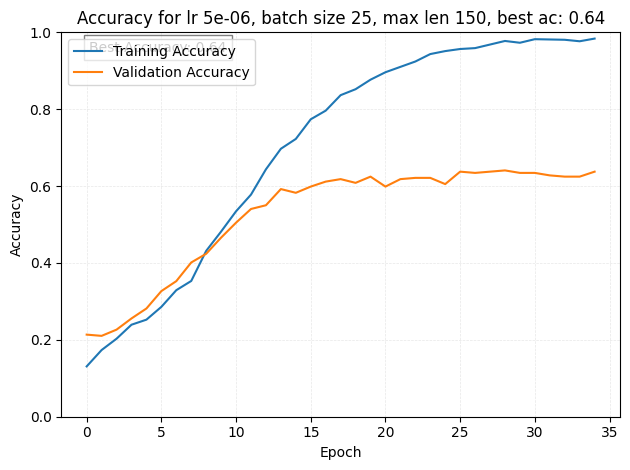

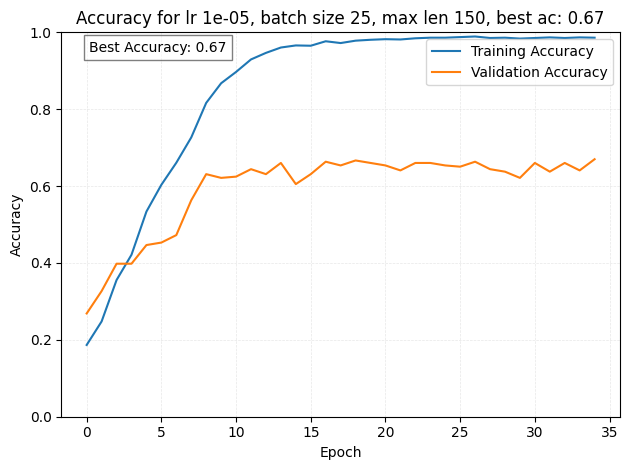

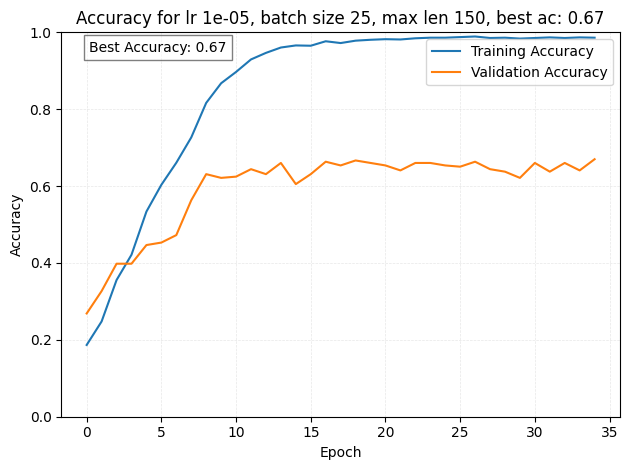

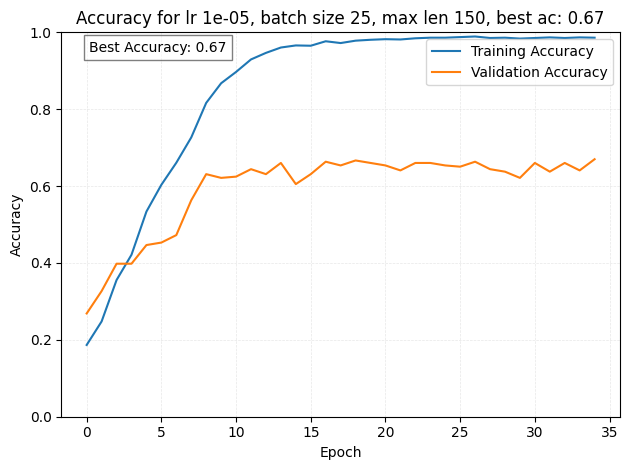

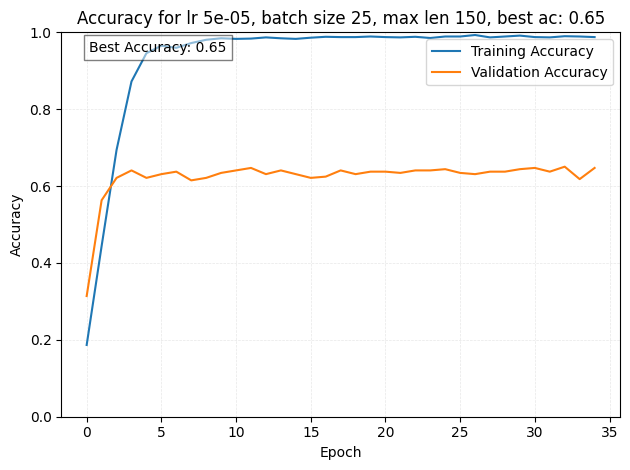

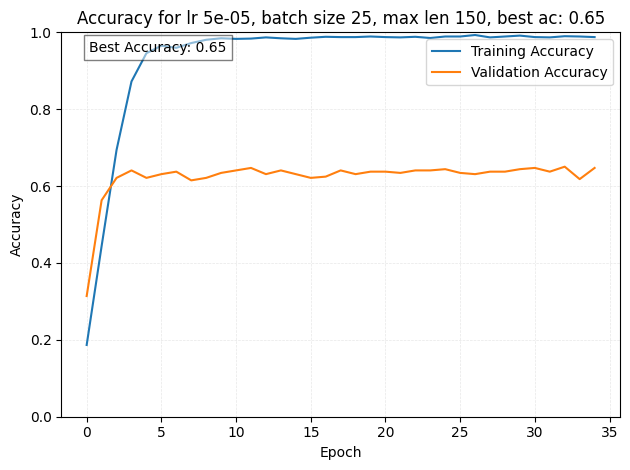

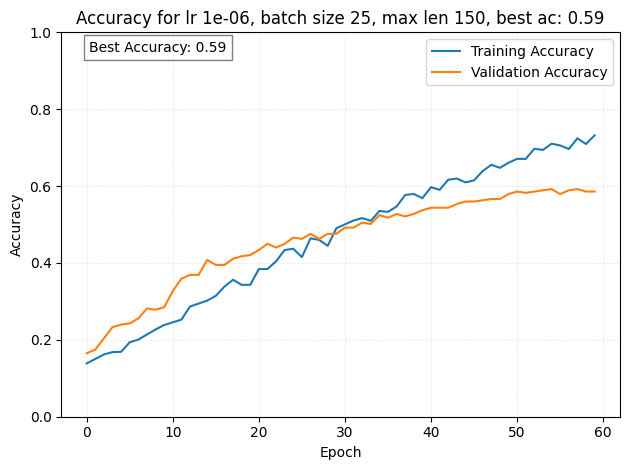

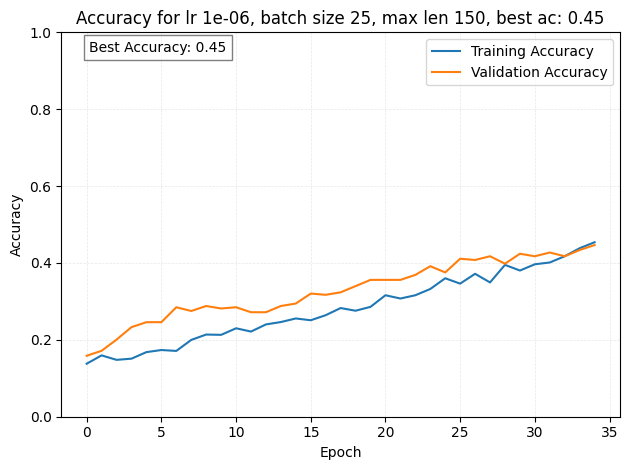

In [3]:
boop = plot(results_dir, type = 'multi')

In [4]:
boop

,learning_rate,num_epochs,batch_size,max_len,best_val_accuracy
model_id,,,,,
08840e67-c4cd-46a0-9f9a-aab6a7275813,0.000005,35,25,150,0.640777
5e6b1a3c-b12c-4d06-87ef-a90eae819ee4,0.000010,35,25,150,0.669903
5e6b1a3c-b12c-4d06-87ef-a90eae819ee4,0.000010,35,25,150,0.669903
5e6b1a3c-b12c-4d06-87ef-a90eae819ee4,0.000010,35,25,150,0.669903
8fe23a85-c5f4-4934-8f0a-ffe324d7fdf5,0.000050,35,25,150,0.650485
8fe23a85-c5f4-4934-8f0a-ffe324d7fdf5,0.000050,35,25,150,0.650485
ccb211a9-0347-40b8-b7da-b4c325af7a6d,0.000001,60,25,150,0.592233
f0d84600-64be-4066-bb19-d4edbcca443e,0.000001,35,25,150,0.446602
